BRINGING THE DOGS - CATS - PANDAS  DATASET from Kaggle

This notebook ALSO CREATES THE DIRECTORY STRUCTURE THAT WE WANT  

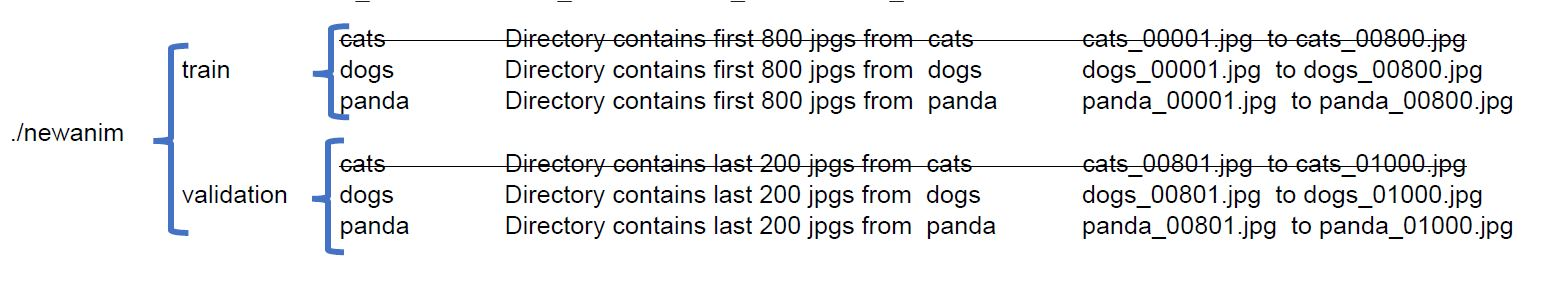

(to THEN follow a process similar to the one used in process ni Chapter 5 of the book for for Dogs-vs-Cat)

In [1]:
# Putting the kaggle.json file in place for this Colab session
# Upload kaggle.json from your PC - THese 2 lines will ASK you to CHOOSE the file in your PC
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafiahmed01","key":"98c5096cfb214557bfdca79676c58d77"}'}

In [2]:
# IF NECESSARY remove a PREVIOUS directory for kaggle.json
!rm -r ~/.kaggle/

rm: cannot remove '/root/.kaggle/': No such file or directory


In [3]:
# Create an appropriate directory for your kaggle.json file and put it there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IF YOU ALREADY HAVE THE Kaggle.json file in place - CONTINUE HERE

In [4]:
# bringing in the dataset
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 98% 369M/376M [00:04<00:00, 113MB/s]
100% 376M/376M [00:04<00:00, 80.7MB/s]


In [5]:
!ls -l

total 384648
-rw-r--r-- 1 root root 393866738 Apr 12 20:35 animal-image-datasetdog-cat-and-panda.zip
-rw-r--r-- 1 root root        67 Apr 12 20:35 kaggle.json
drwxr-xr-x 1 root root      4096 Apr  7 13:36 sample_data


In [6]:
# Quietly UNZIP the file  animal-image-datasetdog-cat-and-panda.zip
!unzip -qq animal-image-datasetdog-cat-and-panda.zip


In [7]:
!ls -l

total 384656
-rw-r--r-- 1 root root 393866738 Apr 12 20:35 animal-image-datasetdog-cat-and-panda.zip
drwxr-xr-x 7 root root      4096 Apr 12 20:35 animals
drwxr-xr-x 2 root root      4096 Apr 12 20:35 images
-rw-r--r-- 1 root root        67 Apr 12 20:35 kaggle.json
drwxr-xr-x 1 root root      4096 Apr  7 13:36 sample_data


In [8]:
!rm -r newanim   # ONLY for cleaning up aafter a failed attempt

rm: cannot remove 'newanim': No such file or directory


In [9]:
!ls -l ./animals/

total 116
drwxr-xr-x 5 root root  4096 Apr 12 20:35 animals
drwxr-xr-x 2 root root 36864 Apr 12 20:35 cats
drwxr-xr-x 2 root root 36864 Apr 12 20:35 dogs
drwxr-xr-x 2 root root  4096 Apr 12 20:35 images
drwxr-xr-x 2 root root 36864 Apr 12 20:35 panda


In [ ]:
# VERIFYING THAT YOU NOW HAVE 1000 IMAGES IN THE # DIRECTORIES
# If you "uncomment" any of these 3 lines. The ouput will list ONE THOUSAND LINES
# where each line is the information about one JPG file
# For example if you uncomment    !ls -l ./animals/cats/
# YOU WILL SEE:
#-rw-r--r-- 1 root root 30233 Oct 24  2019 cats_00001.jpg
# -rw-r--r-- 1 root root 32771 Oct 24  2019 cats_00002.jpg
# ....
# -rw-r--r-- 1 root root 13243 Oct 24  2019 cats_00999.jpg
# -rw-r--r-- 1 root root 26213 Oct 24  2019 cats_01000.jpg
#
#
# !ls -l ./animals/cats/
# !ls -l ./animals/dogs/
# !ls -l ./animals/panda/

!ls -l  ./animals/

total 116
drwxr-xr-x 5 root root  4096 Apr 12 02:04 animals
drwxr-xr-x 2 root root 36864 Apr 12 02:04 cats
drwxr-xr-x 2 root root 36864 Apr 12 02:04 dogs
drwxr-xr-x 2 root root  4096 Apr 12 02:04 images
drwxr-xr-x 2 root root 36864 Apr 12 02:04 panda


NOW TRYING TO CREAT THE NEW DIRECTORY STRUCTURE

Under newanim 2 subdirectories: train and validation

within EACH of those 2, will have 3 subdirectories:  dogs cats   panda

Notice there is no final "s" is in panda

That is also true regarding the individual filenames: cats_00001.jpg but panda_00001.jpg

In [ ]:
#ONLY FOR DEBUGGING
# uncomment these lines ONLY if you need to REMOVE
# DIRECTORIES PREVIOUSLY CREATED by failed attempts
#
# !rm -r ./newanim/train/
# !rm -r ./newanim/validation/


In [10]:
import os, shutil, pathlib
original_dir = pathlib.Path('animals')
new_base_dir = pathlib.Path('newanim')
def make_subset(subset_name, start_index, end_index):
  # for category in ('cats', 'dogs', 'panda'):
  for category in ('dogs', 'panda'):
    dir = new_base_dir / subset_name / category
    dirsrc = original_dir / category
    os.makedirs(dir)
    fnames = ['{}_{:05d}.jpg'.format(category, i)
                  for i in range(start_index, end_index)]
    for fname in fnames:
     shutil.copyfile(src=dirsrc / fname , dst=dir / fname)    
    
# make_subset('train', start_index=0, end_index=1000)
# make_subset('validation', start_index=1000, end_index=1500)
# # make_subset('test', start_index=1500, end_index=2500)

make_subset('train', start_index=1, end_index=801)
make_subset('validation', start_index=801, end_index=1001)

In [11]:
# VERIFY sub-directories under train
!ls -l  ./newanim/train/

total 64
drwxr-xr-x 2 root root 32768 Apr 12 20:35 dogs
drwxr-xr-x 2 root root 32768 Apr 12 20:35 panda


In [12]:
# VERIFY sub-directories under validation
!ls -l  ./newanim/validation/

total 24
drwxr-xr-x 2 root root 12288 Apr 12 20:35 dogs
drwxr-xr-x 2 root root 12288 Apr 12 20:35 panda


In [ ]:
# ONLY uncomment &execute this cell if you need to see al the files in TRAIN
# IT WILL print out 800 + 800 + 800 = 2400 filenames!

# Verifying the 3 "train" subdirs
#!ls   ./newanim/train/*

In [ ]:
# ONLY uncomment & execute this cell if you need to see al the files in VALIDATION
# IT WILL print out 200 + 200 + 200 = 600 filenames!

# Verifying the 3 "validation" subdirs
# !ls   ./newanim/validation/*

NOTICE: DO NOT EXECUTE THIS LASTCELL IF YOU WANT TO USE THE APPROACH IN CH 5 (ED 1), (instead of the approach in CH 8, E 2)

 Do not do this - NOW using Listing 8.9 (from 2ND ED.) to do the preprocessing and create img datasets

In [ ]:
 ### CELL ERASED BECAUSE SHOULD NOT BE USED FOR FOLLOWING APPROACH IN CH 5

YOU WILL NEED TO MODIFY SOME OF THE PREVIOUS CELLS WHEN, FOR EXAMPLE YOU ONLY WANT TO DEAL WITH PANDAS AND DOGS.
For example in the deinition of function get_subset, above, the line

for category in ('cats', 'dogs', 'panda'):

may need to be changed to

for category in ('dogs', 'panda'):

In [13]:
from matplotlib import image
from matplotlib import pyplot

dd = image.imread('/content/newanim/train/dogs/dogs_00001.jpg')
dd.shape


(478, 382, 3)

In [14]:
base_dir = pathlib.Path('newanim')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models

#def pvdm1():
pvdm1 = models.Sequential()
pvdm1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvdm1.add(layers.MaxPooling2D((2, 2)))
pvdm1.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvdm1.add(layers.MaxPooling2D((2, 2)))
#pvdm1.add(layers.Conv2D(128, (3, 3), activation='relu'))
#pvdm1.add(layers.MaxPooling2D((2, 2)))
pvdm1.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvdm1.add(layers.MaxPooling2D((2, 2)))
pvdm1.add(layers.Flatten())
pvdm1.add(layers.Dense(512, activation='relu'))
pvdm1.add(layers.Dense(1, activation='sigmoid'))
  
  #return model

In [ ]:
pvdm1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [ ]:
from keras import optimizers

pvdm1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history_pvdm1 = pvdm1.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=30,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/30
80/80 [==============================] - 8s 98ms/step - loss: 0.6711 - acc: 0.6755 - val_loss: 0.3317 - val_acc: 0.8700
Epoch 2/30
80/80 [==============================] - 7s 92ms/step - loss: 0.3690 - acc: 0.8576 - val_loss: 0.2885 - val_acc: 0.8950
Epoch 3/30
80/80 [==============================] - 8s 95ms/step - loss: 0.3304 - acc: 0.8584 - val_loss: 0.3761 - val_acc: 0.8375
Epoch 4/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2798 - acc: 0.8827 - val_loss: 0.2570 - val_acc: 0.8950
Epoch 5/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2370 - acc: 0.9082 - val_loss: 0.2889 - val_acc: 0.8750
Epoch 6/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2084 - acc: 0.9123 - val_loss: 0.2634 - val_acc: 0.9050
Epoch 7/30
80/80 [==============================] - 8s 94ms/step - loss: 0.1685 - acc: 0.9361 - val_loss: 0.2350 - val_acc: 0.9125
Epoch 8/30
80/80 [==============================] - 7s 91ms/step - loss: 0.1495 - a

In [ ]:
pvdm1.save('pandas_and_dogs_1.h5')

In [ ]:
!ls -l

total 587492
-rw-r--r-- 1 root root 393866738 Apr 11 01:17  animal-image-datasetdog-cat-and-panda.zip
drwxr-xr-x 7 root root      4096 Apr 11 01:17  animals
drwxr-xr-x 2 root root      4096 Apr 11 03:55  images
-rw-r--r-- 1 root root        67 Apr 11 03:23 'kaggle (1).json'
-rw-r--r-- 1 root root        67 Apr 11 01:17  kaggle.json
drwxr-xr-x 4 root root      4096 Apr 11 03:55  newanim
-rw-r--r-- 1 root root 152323552 Apr 11 03:59  pandas_and_dogs_1.h5
-rw-r--r-- 1 root root  27684448 Apr 11 01:28  pandas_and_dogs_2.h5
-rw-r--r-- 1 root root  27684648 Apr 11 02:04  pandas_and_dogs_3.h5
drwxr-xr-x 1 root root      4096 Apr  7 13:36  sample_data


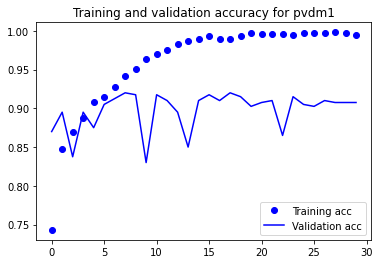

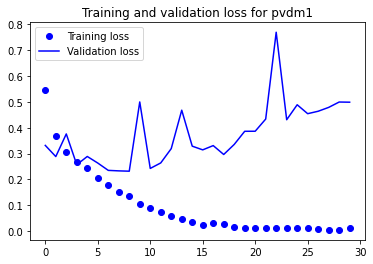

In [ ]:
import matplotlib.pyplot as plt

acc_pvdm1 = history_pvdm1.history['acc']
val_acc_pvdm1 = history_pvdm1.history['val_acc']
loss_pvdm1 = history_pvdm1.history['loss']
val_loss_pvdm1 = history_pvdm1.history['val_loss']

epochs = range(len(acc_pvdm1))

plt.plot(epochs, acc_pvdm1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_pvdm1, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvdm1')
plt.legend()

plt.figure()

plt.plot(epochs, loss_pvdm1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_pvdm1, 'b', label='Validation loss')
plt.title('Training and validation loss for pvdm1')
plt.legend()

plt.show()

In [ ]:
history_pvdm1_final = pvdm1.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=8,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/8
80/80 [==============================] - 25s 111ms/step - loss: 0.6162 - acc: 0.6657 - val_loss: 0.4281 - val_acc: 0.8050
Epoch 2/8
80/80 [==============================] - 8s 101ms/step - loss: 0.3847 - acc: 0.8298 - val_loss: 0.3004 - val_acc: 0.8750
Epoch 3/8
80/80 [==============================] - 8s 103ms/step - loss: 0.3173 - acc: 0.8661 - val_loss: 0.2993 - val_acc: 0.8800
Epoch 4/8
80/80 [==============================] - 8s 103ms/step - loss: 0.2461 - acc: 0.9024 - val_loss: 0.2712 - val_acc: 0.8975
Epoch 5/8
80/80 [==============================] - 8s 103ms/step - loss: 0.2117 - acc: 0.9244 - val_loss: 0.2797 - val_acc: 0.8975
Epoch 6/8
80/80 [==============================] - 8s 102ms/step - loss: 0.1871 - acc: 0.9195 - val_loss: 0.2387 - val_acc: 0.9075
Epoch 7/8
80/80 [==============================] - 8s 102ms/step - loss: 0.1335 - acc: 0.9497 - val_loss: 0.2444 - val_acc: 0.9175
Epoch 8/8
80/80 [==============================] - 8s 102ms/step - loss: 0.1105 - 

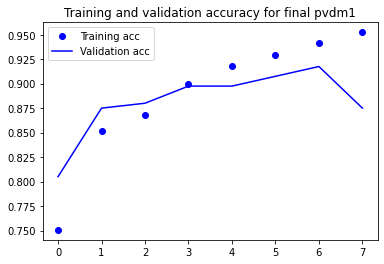

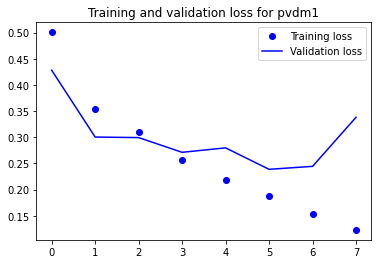

In [ ]:
import matplotlib.pyplot as plt

acc_pvdm1_final = history_pvdm1_final.history['acc']
val_acc_pvdm1_final = history_pvdm1_final.history['val_acc']
loss_pvdm1_final = history_pvdm1_final.history['loss']
val_loss_pvdm1_final = history_pvdm1_final.history['val_loss']

epochs = range(len(acc_pvdm1_final))

plt.plot(epochs, acc_pvdm1_final, 'bo', label='Training acc')
plt.plot(epochs, val_acc_pvdm1_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvdm1')
plt.legend()

plt.figure()

plt.plot(epochs, loss_pvdm1_final, 'bo', label='Training loss')
plt.plot(epochs, val_loss_pvdm1_final, 'b', label='Validation loss')
plt.title('Training and validation loss for pvdm1')
plt.legend()

plt.show()

In [ ]:
pvdm1.save('pandas_and_dogs_1.h5')

In [31]:
from keras import layers
from keras import models

#pvdm2
pvdm2 = models.Sequential()
pvdm2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvdm2.add(layers.MaxPooling2D((2, 2)))
pvdm2.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvdm2.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
pvdm2.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvdm2.add(layers.MaxPooling2D((2, 2)))
pvdm2.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvdm2.add(layers.MaxPooling2D((2, 2)))
pvdm2.add(layers.Flatten())
pvdm2.add(layers.Dropout(0.5))
pvdm2.add(layers.Dense(512, activation='relu'))
pvdm2.add(layers.Dense(1, activation='sigmoid'))
  

In [ ]:
pvdm2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [32]:
from keras import optimizers

pvdm2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history_pvdm2 = pvdm2.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=30,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/30
80/80 [==============================] - 8s 94ms/step - loss: 0.5993 - acc: 0.6611 - val_loss: 0.3845 - val_acc: 0.8250
Epoch 2/30
80/80 [==============================] - 8s 95ms/step - loss: 0.3787 - acc: 0.8374 - val_loss: 0.4161 - val_acc: 0.8000
Epoch 3/30
80/80 [==============================] - 8s 94ms/step - loss: 0.3459 - acc: 0.8576 - val_loss: 0.3343 - val_acc: 0.8650
Epoch 4/30
80/80 [==============================] - 7s 92ms/step - loss: 0.3219 - acc: 0.8625 - val_loss: 0.3788 - val_acc: 0.8525
Epoch 5/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2719 - acc: 0.8836 - val_loss: 0.2869 - val_acc: 0.8925
Epoch 6/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2750 - acc: 0.8889 - val_loss: 0.2908 - val_acc: 0.8825
Epoch 7/30
80/80 [==============================] - 7s 92ms/step - loss: 0.2360 - acc: 0.9028 - val_loss: 0.2691 - val_acc: 0.8900
Epoch 8/30
80/80 [==============================] - 8s 94ms/step - loss: 0.2339 - a

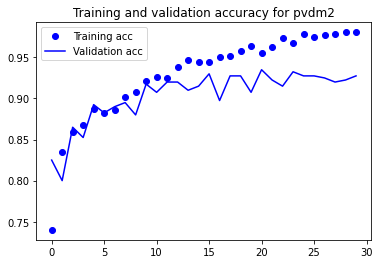

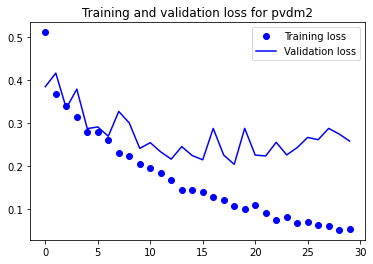

In [ ]:
import matplotlib.pyplot as plt

acc_pvdm2 = history_pvdm2.history['acc']
val_acc_pvdm2 = history_pvdm2.history['val_acc']
loss_pvdm2 = history_pvdm2.history['loss']
val_loss_pvdm2 = history_pvdm2.history['val_loss']

epochs2 = range(len(acc_pvdm2))

plt.plot(epochs2, acc_pvdm2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_pvdm2, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvdm2')
plt.legend()

plt.figure()

plt.plot(epochs2, loss_pvdm2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_pvdm2, 'b', label='Validation loss')
plt.title('Training and validation loss for pvdm2')
plt.legend()

plt.show()

In [37]:
history_pvdm2_final = pvdm2.fit(
      train_generator,
      steps_per_epoch = 80,
      epochs=19,
      validation_data=validation_generator,validation_steps=20)

Epoch 1/19
80/80 [==============================] - 9s 111ms/step - loss: 0.1097 - acc: 0.9613 - val_loss: 0.2199 - val_acc: 0.9225
Epoch 2/19
80/80 [==============================] - 9s 110ms/step - loss: 0.1095 - acc: 0.9588 - val_loss: 0.2396 - val_acc: 0.9125
Epoch 3/19
80/80 [==============================] - 9s 110ms/step - loss: 0.0938 - acc: 0.9638 - val_loss: 0.2011 - val_acc: 0.9325
Epoch 4/19
80/80 [==============================] - 8s 104ms/step - loss: 0.0906 - acc: 0.9638 - val_loss: 0.2260 - val_acc: 0.9325
Epoch 5/19
80/80 [==============================] - 8s 104ms/step - loss: 0.0849 - acc: 0.9700 - val_loss: 0.3157 - val_acc: 0.9025
Epoch 6/19
80/80 [==============================] - 9s 110ms/step - loss: 0.0820 - acc: 0.9719 - val_loss: 0.2421 - val_acc: 0.9325
Epoch 7/19
80/80 [==============================] - 9s 110ms/step - loss: 0.0776 - acc: 0.9744 - val_loss: 0.2206 - val_acc: 0.9350
Epoch 8/19
80/80 [==============================] - 9s 110ms/step - loss: 0.

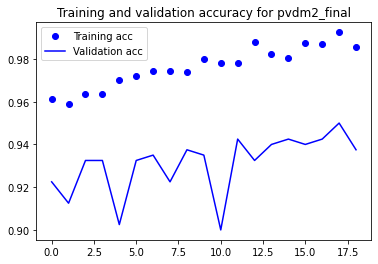

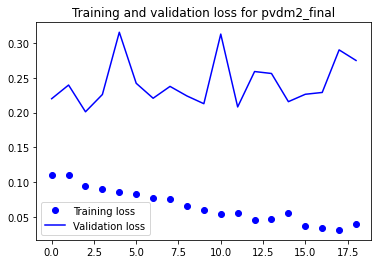

In [38]:
import matplotlib.pyplot as plt

acc_pvdm2_final = history_pvdm2_final.history['acc']
val_acc_pvdm2_final = history_pvdm2_final.history['val_acc']
loss_pvdm2_final = history_pvdm2_final.history['loss']
val_loss_pvdm2_final = history_pvdm2_final.history['val_loss']

epochs2 = range(len(acc_pvdm2_final))

plt.plot(epochs2, acc_pvdm2_final, 'bo', label='Training acc')
plt.plot(epochs2, val_acc_pvdm2_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvdm2_final')
plt.legend()

plt.figure()

plt.plot(epochs2, loss_pvdm2_final, 'bo', label='Training loss')
plt.plot(epochs2, val_loss_pvdm2_final, 'b', label='Validation loss')
plt.title('Training and validation loss for pvdm2_final')
plt.legend()

plt.show()

In [39]:
pvdm2.save('pandas_and_dogs_2.h5')

**Data Augmentation**

In [16]:
#Data Augmentation

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

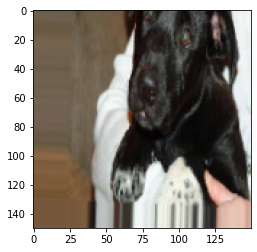

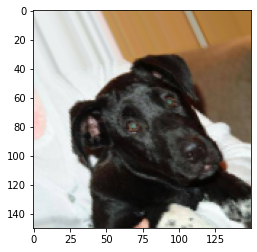

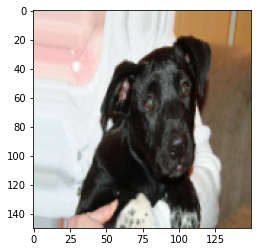

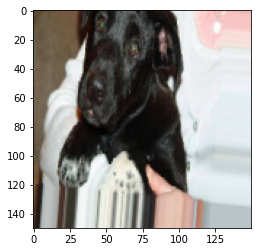

In [18]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Directories
base_dir = pathlib.Path('newanim')
train_dir = os.path.join(base_dir, 'train')
train_dir_dogs = os.path.join(train_dir, 'dogs')

fnames = [os.path.join(train_dir_dogs, fname) for fname in os.listdir(train_dir_dogs)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
from keras import layers
from keras import models
from keras import optimizers

#pvdm3

pvdm3 = models.Sequential()
pvdm3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
pvdm3.add(layers.MaxPooling2D((2, 2)))
pvdm3.add(layers.Conv2D(64, (3, 3), activation='relu'))
pvdm3.add(layers.MaxPooling2D((2, 2)))
pvdm3.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvdm3.add(layers.MaxPooling2D((2, 2)))
pvdm3.add(layers.Conv2D(128, (3, 3), activation='relu'))
pvdm3.add(layers.MaxPooling2D((2, 2)))
pvdm3.add(layers.Flatten())
pvdm3.add(layers.Dropout(0.5))
pvdm3.add(layers.Dense(512, activation='relu'))
pvdm3.add(layers.Dense(1, activation='sigmoid'))

pvdm3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
pvdm3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [22]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen1 = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        # batch_size=32,
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator1 = test_datagen1.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        # batch_size=32,
        batch_size=50,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [23]:
history_pvdm3 = pvdm3.fit(
      train_generator_aug,
      # steps_per_epoch=100,
      steps_per_epoch=32,
      epochs=100,
      validation_data=validation_generator1,
      #validation_steps=50)
      validation_steps=8)

Epoch 1/100
32/32 [==============================] - 32s 493ms/step - loss: 0.6687 - acc: 0.5683 - val_loss: 0.4510 - val_acc: 0.8125
Epoch 2/100
32/32 [==============================] - 16s 490ms/step - loss: 0.5120 - acc: 0.7643 - val_loss: 0.3916 - val_acc: 0.8275
Epoch 3/100
32/32 [==============================] - 16s 496ms/step - loss: 0.4253 - acc: 0.8093 - val_loss: 0.4658 - val_acc: 0.8025
Epoch 4/100
32/32 [==============================] - 15s 475ms/step - loss: 0.4105 - acc: 0.8187 - val_loss: 0.4275 - val_acc: 0.8250
Epoch 5/100
32/32 [==============================] - 16s 490ms/step - loss: 0.4188 - acc: 0.8250 - val_loss: 0.3333 - val_acc: 0.8475
Epoch 6/100
32/32 [==============================] - 16s 492ms/step - loss: 0.3985 - acc: 0.8262 - val_loss: 0.3402 - val_acc: 0.8575
Epoch 7/100
32/32 [==============================] - 16s 493ms/step - loss: 0.4094 - acc: 0.8245 - val_loss: 0.4054 - val_acc: 0.8375
Epoch 8/100
32/32 [==============================] - 16s 495ms

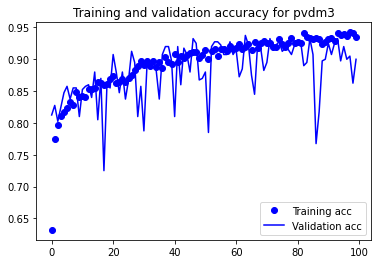

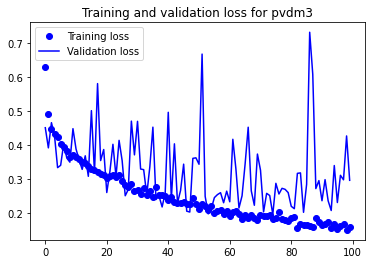

In [24]:
import matplotlib.pyplot as plt

acc_pvdm3 = history_pvdm3.history['acc']
val_acc_pvdm3 = history_pvdm3.history['val_acc']
loss_pvdm3 = history_pvdm3.history['loss']
val_loss_pvdm3 = history_pvdm3.history['val_loss']

epochs3 = range(len(acc_pvdm3))

plt.plot(epochs3, acc_pvdm3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_pvdm3, 'b', label='Validation acc')
plt.title('Training and validation accuracy for pvdm3')
plt.legend()

plt.figure()

plt.plot(epochs3, loss_pvdm3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_pvdm3, 'b', label='Validation loss')
plt.title('Training and validation loss for pvdm3')
plt.legend()

plt.show()

In [40]:
history_pvdm3_final = pvdm3.fit(
      train_generator_aug,
      # steps_per_epoch=100,
      steps_per_epoch=32,
      epochs=54,
      validation_data=validation_generator1,
      #validation_steps=50)
      validation_steps=8)

Epoch 1/54
32/32 [==============================] - 16s 500ms/step - loss: 0.1200 - acc: 0.9556 - val_loss: 0.2456 - val_acc: 0.9275
Epoch 2/54
32/32 [==============================] - 16s 492ms/step - loss: 0.1151 - acc: 0.9506 - val_loss: 0.2287 - val_acc: 0.9325
Epoch 3/54
32/32 [==============================] - 16s 491ms/step - loss: 0.1309 - acc: 0.9450 - val_loss: 0.1843 - val_acc: 0.9325
Epoch 4/54
32/32 [==============================] - 16s 491ms/step - loss: 0.1116 - acc: 0.9581 - val_loss: 0.2932 - val_acc: 0.9050
Epoch 5/54
32/32 [==============================] - 16s 494ms/step - loss: 0.1097 - acc: 0.9600 - val_loss: 0.2229 - val_acc: 0.9375
Epoch 6/54
32/32 [==============================] - 16s 493ms/step - loss: 0.1193 - acc: 0.9519 - val_loss: 0.1811 - val_acc: 0.9375
Epoch 7/54
32/32 [==============================] - 15s 472ms/step - loss: 0.1146 - acc: 0.9563 - val_loss: 0.2491 - val_acc: 0.9325
Epoch 8/54
32/32 [==============================] - 16s 495ms/step - 

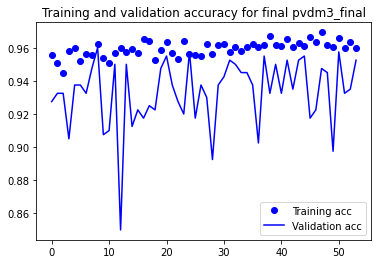

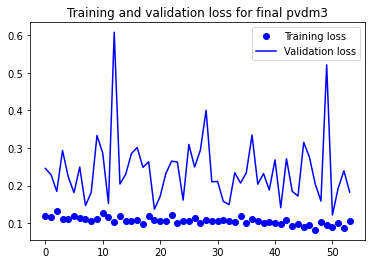

In [41]:
import matplotlib.pyplot as plt

acc_pvdm3_final = history_pvdm3_final.history['acc']
val_acc_pvdm3_final = history_pvdm3_final.history['val_acc']
loss_pvdm3_final = history_pvdm3_final.history['loss']
val_loss_pvdm3_final = history_pvdm3_final.history['val_loss']

epochs3 = range(len(acc_pvdm3_final))

plt.plot(epochs3, acc_pvdm3_final, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_pvdm3_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvdm3_final')
plt.legend()

plt.figure()

plt.plot(epochs3, loss_pvdm3_final, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_pvdm3_final, 'b', label='Validation loss')
plt.title('Training and validation loss for final pvdm3')
plt.legend()

plt.show()

In [42]:
pvdm3.save('pandas_and_dogs_3.h5')

In [43]:
pvdm3.get_weights()

[array([[[[ 7.71204904e-02,  8.92281979e-02,  3.76499332e-02,
           -1.08455732e-01,  2.33135261e-02, -8.81084576e-02,
           -1.24980614e-01, -1.29436359e-01,  3.79877165e-02,
           -1.24093495e-01,  1.06425144e-01,  1.12217747e-01,
           -5.50426990e-02,  9.81736375e-05, -8.82286355e-02,
           -6.92523792e-02, -1.68011878e-02, -1.02727294e-01,
           -2.20761430e-02, -1.03862375e-01, -2.12792195e-02,
            3.67218666e-02, -6.41316641e-03,  4.96006012e-02,
            1.88684911e-02,  4.71610716e-03, -1.02636918e-01,
           -4.10391875e-02,  1.27851963e-01, -1.22307554e-01,
            5.62835336e-02,  9.32155550e-02],
          [-1.13505006e-01, -5.21224923e-02,  1.01732813e-01,
            1.26275420e-01,  7.20622241e-02, -1.22356892e-01,
            1.02912001e-01, -1.13074578e-01, -4.65274230e-02,
           -2.50405092e-02,  3.95079181e-02,  9.47981328e-02,
            1.04107961e-01,  1.26924530e-01, -1.40307188e-01,
           -1.04802977e-

In [ ]:
history_pvdm3_final = pvdm3.fit(
      train_generator_aug,
      # steps_per_epoch=100,
      steps_per_epoch=32,
      epochs=42,
      validation_data=validation_generator1,
      #validation_steps=50)
      validation_steps=8)

Epoch 1/42
32/32 [==============================] - 14s 424ms/step - loss: 0.1180 - acc: 0.9525 - val_loss: 0.2022 - val_acc: 0.9450
Epoch 2/42
32/32 [==============================] - 13s 420ms/step - loss: 0.0968 - acc: 0.9594 - val_loss: 0.1941 - val_acc: 0.9450
Epoch 3/42
32/32 [==============================] - 13s 422ms/step - loss: 0.1175 - acc: 0.9556 - val_loss: 0.3937 - val_acc: 0.9250
Epoch 4/42
32/32 [==============================] - 13s 419ms/step - loss: 0.1135 - acc: 0.9575 - val_loss: 0.2341 - val_acc: 0.9375
Epoch 5/42
32/32 [==============================] - 14s 428ms/step - loss: 0.1144 - acc: 0.9525 - val_loss: 0.2940 - val_acc: 0.9375
Epoch 6/42
32/32 [==============================] - 13s 418ms/step - loss: 0.1015 - acc: 0.9531 - val_loss: 0.4420 - val_acc: 0.9250
Epoch 7/42
32/32 [==============================] - 13s 418ms/step - loss: 0.1215 - acc: 0.9481 - val_loss: 0.3245 - val_acc: 0.9275
Epoch 8/42
32/32 [==============================] - 14s 425ms/step - 

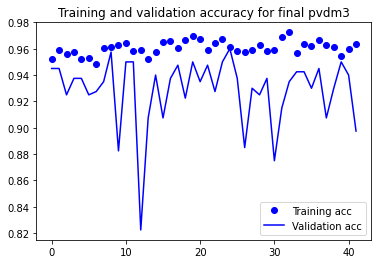

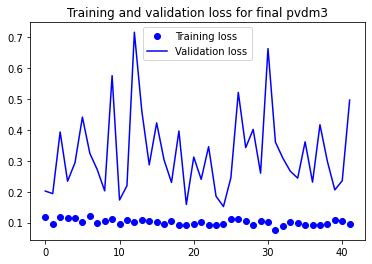

In [ ]:
import matplotlib.pyplot as plt

acc_pvdm3_final = history_pvdm3_final.history['acc']
val_acc_pvdm3_final = history_pvdm3_final.history['val_acc']
loss_pvdm3_final = history_pvdm3_final.history['loss']
val_loss_pvdm3_final = history_pvdm3_final.history['val_loss']

epochs3 = range(len(acc_pvdm3_final))

plt.plot(epochs3, acc_pvdm3_final, 'bo', label='Training acc')
plt.plot(epochs3, val_acc_pvdm3_final, 'b', label='Validation acc')
plt.title('Training and validation accuracy for final pvdm3')
plt.legend()

plt.figure()

plt.plot(epochs3, loss_pvdm3_final, 'bo', label='Training loss')
plt.plot(epochs3, val_loss_pvdm3_final, 'b', label='Validation loss')
plt.title('Training and validation loss for final pvdm3')
plt.legend()

plt.show()